In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


In [10]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the training data
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_data.info()  # Check data types and missing values
train_data.describe()  # Summary statistics for numerical features
train_data.isnull().sum()  # Count missing values in each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Fill missing Age values with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Fill missing Embarked values with the mode (most frequent value)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Fill missing Fare values in test data
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)


In [15]:



from sklearn.preprocessing import LabelEncoder

# Create FamilySize feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Encode categorical variables (Sex, Embarked)
label_sex = LabelEncoder()
label_embarked = LabelEncoder()

# Fit the encoders on the training data and transform
train_data['Sex'] = label_sex.fit_transform(train_data['Sex'])
train_data['Embarked'] = label_embarked.fit_transform(train_data['Embarked'])

# For the test set, transform using the same encoder
# We will use 'transform' to map test values based on the training values.
# However, we need to handle unknown values.
test_data['Sex'] = test_data['Sex'].map(lambda s: label_sex.transform([s])[0] if s in label_sex.classes_ else -1)
test_data['Embarked'] = test_data['Embarked'].map(lambda e: label_embarked.transform([e])[0] if e in label_embarked.classes_ else -1)


In [16]:
# Select features for training
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked']
X = train_data[features]
y = train_data['Survived']

# For test data
X_test = test_data[features]


In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the validation set
y_pred = logreg.predict(X_val)


Accuracy: 80.45%


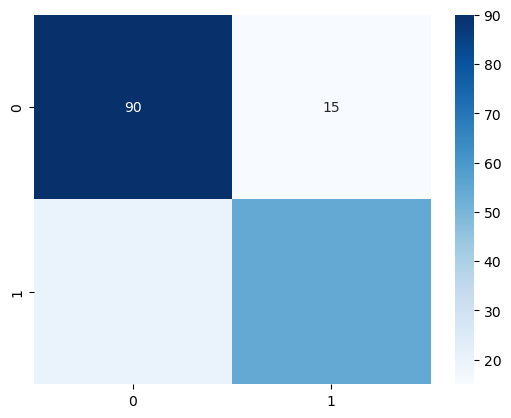

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [19]:
# Accuracy score
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

# Classification report
print(classification_report(y_val, y_pred))


In [23]:
# # Predict on the test data
# test_predictions = logreg.predict(X_test)

# # Prepare the submission file
# submission = pd.DataFrame({
#     'PassengerId': test_data['PassengerId'],
#     'Survived': test_predictions
# })

# # Save submission to CSV file
# submission.to_csv('titanic_submission.csv', index=False)


# Ensure no missing values in the test data
X_test.fillna(0, inplace=True)

# Ensure X_test has the same columns as X_train
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0

# Reorder columns in X_test to match X_train
X_test = X_test[X_train.columns]

# Check the shape of X_test to ensure it matches X_train
assert X_test.shape[1] == X_train.shape[1], "The number of features in X_test must match X_train"

# Predict on the test data
test_predictions = logreg.predict(X_test)

# Prepare the submission file
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

# Save submission to CSV file
submission.to_csv('titanic_submission.csv', index=False)
